<a href="https://colab.research.google.com/github/alishahmad/cove/blob/master/Full_code_Sentiment_Analysis_VADER_using_Reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
Reddit is a social news site where users create and share content, with millions of active users daily. This network contains millions of rich data that can be used in sentiment analysis projects. Reddit is one of the biggest platforms where individuals ask questions and share ideas regarding topics ranging from Politics, Entertainment, Money, Tech, etc.

# **Prerequisites**
To follow this article you will need the following installed and activated on your PC. Also, feel free to fork the GitHub Repo for the code and other necessary materials.

*   Reddit Developer Account.
*   Installation of PRAW Library.

# Developer Application
In order to have full access to Reddit API, you will need to create a developer account. This can be done by clicking on this link [Prefs](https://www.reddit.com/prefs/apps) and follow the instruction in the diagram below.

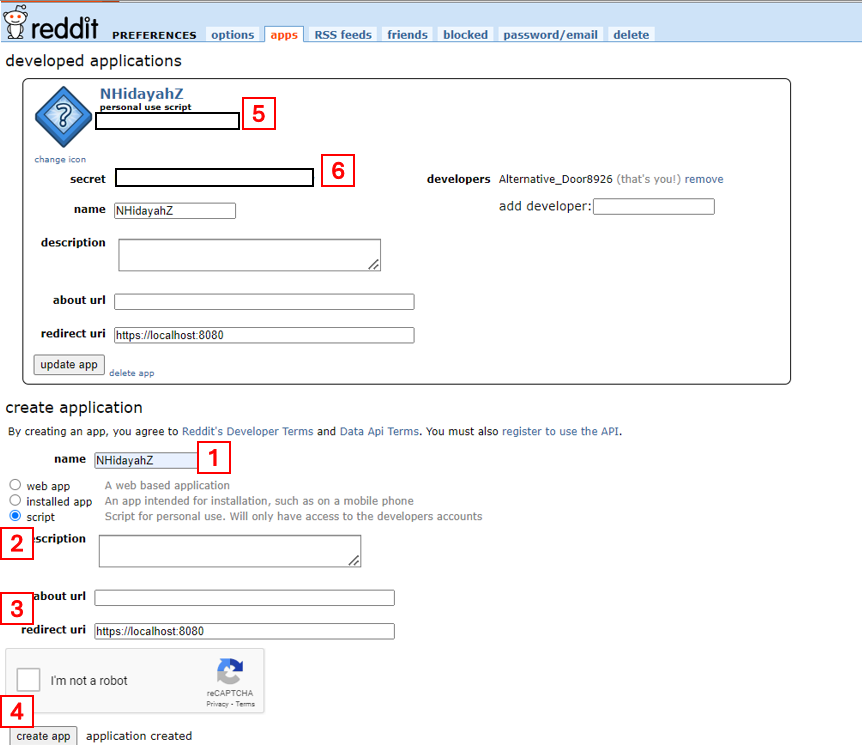


1.   App Name: Firstly, you need to give your app a name.
2.   Script: Check the Script button, this is used for personal use and projects.
3.   Redirect Uri: For this, we will be using our local host of our pc ”https://localhost:8888" or 8080.
4.   Create app: The create app will help you generate an ID number and Secret key. (Copy both keys and keep them in a safe place).
5.   Keys: Copy both keys as they will be needed in the code.




# PRAW Installation
The PRAW library provides a means of communication with the Reddit server, it is also known as the Python Reddit API wrapper. It supports three types of applications; Web Applications, Installed Applications, and Script Applications.

Note before you can use the PRAW library, you first must register the appropriate application type on Reddit

In [2]:
pip install praw


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 4.9 MB/s eta 0:00:00


In [3]:
import praw


# Authentication
At this stage, this is where the “*user_agent, keys, and client id*” are needed.

In [4]:
 reddit = praw.Reddit(
    client_id="J5F8RSq6xnclfe-XL9ftoA",
    client_secret="tICAM8DdIHjbO_xQmFdZSriG12KXIg",
    redirect_url="http://localhost:8080",
    user_agent="AmmyAlish",
    check_for_async=False #to avoid warnings of asynchronous environment
)

Import all necessary Libraries

In [5]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

# **# Get Trending Topics from your Subreddit**
A subreddit is a subsidiary category of the Reddit website, and for this session, we will be using the “gold” subreddit channel.

In [6]:
# Hot new rising topics
headlines = set()
for submission in reddit.subreddit("palestine").hot(limit=None):
 print(submission.id) #ID
 print(submission.author) #Author of the subreddit
 print(submission.created_utc) #Date and time being created
 print(submission.score) # Average Score
 print(submission.upvote_ratio) # Upvote ratio
 print(submission.url) # Like to the Subreddit

 break
 headlines.add(submission.title)
print(len(headlines))

1henlq1
Fireavxl
1734247957.0
114
0.97
https://www.reddit.com/r/Palestine/comments/1henlq1/the_myth_of_the_conflict_is_ancient/
0


In [7]:
headlines = set()
for submission in reddit.subreddit("palestine").hot(limit=None):
 headlines.add(submission.title)
print(len(headlines))

940


# **Create a DataFrame**
The DataFrame will help structure the scrapped data into a tabular format that can easily be read.

In [8]:
#Create a dataframe from the scrapped data
palestine_df = pd.DataFrame(headlines)
palestine_df.head()

,0
0,For the fifth time since Israel began its geno...
1,‘Genocide-free’ cola makes a splash in the Uni...
2,"Greta Thunberg: ""If we, as climate activists, ..."
3,Beautiful ❤️
4,Latest picture of freed captive Amjad Atta Qau...


# Rename Column Header
You will need to put the appropriate column header.

In [9]:
palestine_df.columns = ['Titles']
palestine_df.head()

,Titles
0,For the fifth time since Israel began its geno...
1,‘Genocide-free’ cola makes a splash in the Uni...
2,"Greta Thunberg: ""If we, as climate activists, ..."
3,Beautiful ❤️
4,Latest picture of freed captive Amjad Atta Qau...


In [10]:
palestine_df.Titles.duplicated().sum()

0

# Remove Unicode and Hyperlinks
These are unwanted texts, characters, and links, with the removal of these, will help improve our prediction model. The code below uses a regex pattern to quickly remove unwanted characters.

In [11]:
#Create a function to clean the text
def cleanTxt(text):
# text = re.sub(r'@[A-Za-z0–9]+', '', text) #Remove @mentions replace with blank
# text = re.sub(r'#', '', text) #Remove the ‘#’ symbol, replace with blank
# text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
# text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
 text = re.sub(r':', '', text) # Remove :
 return text
#Cleaning the text
palestine_df["Titles"]= palestine_df["Titles"].apply(cleanTxt)
#Show the clean text
palestine_df.head()

,Titles
0,For the fifth time since Israel began its geno...
1,‘Genocide-free’ cola makes a splash in the Uni...
2,"Greta Thunberg ""If we, as climate activists, a..."
3,Beautiful ❤️
4,Latest picture of freed captive Amjad Atta Qau...


In [12]:
#Next we have to remove emoji & Unicode from the social media data.
def remove_emoji(string):
 emoji_pattern = re.compile("["
 u"\U0001F600-\U0001F64F" # emoticons
 u"\U0001F300-\U0001F5FF" # symbols & pictographs
 u"\U0001F680-\U0001F6FF" # transport & map symbols
 u"\U0001F1E0-\U0001F1FF" # flags (iOS)
 u"\U00002500-\U00002BEF" # chinese char
 u"\U00002702-\U000027B0"
 u"\U00002702-\U000027B0"
 u"\U000024C2-\U0001F251"
 u"\U0001f926-\U0001f937"
 u"\U00010000-\U0010ffff"
 u"\u2640-\u2642"
 u"\u2600-\u2B55"
 u"\u200d"
 u"\u23cf"
 u"\u23e9"
 u"\u231a"
 u"\ufe0f" # dingbats
 u"\u3030"
 "]+", flags=re.UNICODE)
 return emoji_pattern.sub(r'', string)

#Cleaning the text
palestine_df["Titles"]= palestine_df["Titles"].apply(remove_emoji)
#Show the clean text
palestine_df.head()

,Titles
0,For the fifth time since Israel began its geno...
1,‘Genocide-free’ cola makes a splash in the Uni...
2,"Greta Thunberg ""If we, as climate activists, a..."
3,Beautiful
4,Latest picture of freed captive Amjad Atta Qau...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Titles').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Sentiment Analysis using Vader**


# **What is VADER?**
**VADER** (*Valence Aware Dictionary and sEntiment Reasoner*) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.

VADER works directly on raw text inputs because it is designed to analyze and score sentences as a whole, including punctuation, capitalization, and special characters like emojis. It includes its own preprocessing steps internally, such as handling negations, slang, and common abbreviations, so you don't need to tokenize or preprocess the text manually unless your specific use case requires additional steps (e.g., removing stopwords, stemming, or cleaning unwanted characters).

In other words, it’s a pre-trained sentiment analysis model for text sentiment analysis. This model relies on the vader_lexicon of the dataset we downloaded earlier, which will map lexical features to the sentiment scores.

# Import Necessary Libraries

In [13]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [14]:
nltk.download('vader_lexicon') # get lexicons data


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

**SentimentIntensityAnalyzer** is a class in the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool, which is part of the vaderSentiment Python library. It is specifically **designed to calculate sentiment scores for text, considering both the polarity (positive/negative sentiment) and the intensity of emotion conveyed.**

Key Features:
* **Pre-trained Model:** It is pre-trained with a lexicon of sentiment-laden words, phrases, and punctuation.
* **Handles Context:** It accounts for the impact of context, such as negations ("not good"), intensifiers ("very bad"), punctuation (e.g., "!!!"), and capitalization (e.g., "GREAT").
* **Supports Emojis and Slang:** It recognizes common emojis and slang to infer sentiment.
* **Scoring:** It outputs sentiment scores that quantify the positive, neutral, and negative sentiments, as well as a compound score representing the overall sentiment.





In [14]:
model = SentimentIntensityAnalyzer()

# **Labeling our Data**
NLTK’s built-in Vader Sentiment Analyzer will simply rank a piece of text as positive, negative or neutral using a lexicon of positive and negative words.

We can utilize this tool by first creating a Sentiment Intensity Analyzer (SIA) to categorize our titles, then we'll use the polarity_scores method to get the sentiment.

We'll append each sentiment dictionary to a results list, which we'll transform into a dataframe:



In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from pprint import pprint # Import the pprint function

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['Titles'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'Titles': 'For the fifth time since Israel began its genocide in Gaza, the US has blocked a '
            'ceasefire resolution with its veto at the UN Security Council.',
  'compound': 0.0772,
  'neg': 0.076,
  'neu': 0.836,
  'pos': 0.087},
 {'Titles': '‘Genocide-free’ cola makes a splash in the United Kingdom',
  'compound': 0.4215,
  'neg': 0.0,
  'neu': 0.714,
  'pos': 0.286},
 {'Titles': 'Greta Thunberg: "If we, as climate activists, aren\'t able to see and speak up '
            'against the current marginalisation and oppression and killing of people today, then '
            'I don\'t think we should be able to call ourselves climate justice activists."',
  'compound': -0.25,
  'neg': 0.1,
  'neu': 0.822,
  'pos': 0.078}]


**compound**: 0.1531
This is the **overall sentiment score**, ranging from **-1 (most negative) to +1 (most positive).**

A **positive value** (like 0.1531) indicates a generally **positive sentiment**, though it's closer to neutral since it's near 0.

**neg**: 0.169
This represents the proportion of the text that is negative. In this case, 16.9% of the sentiment in the analyzed text is negative.

**neu**: 0.625
This is the proportion of the text that is neutral, meaning that 62.5% of the content doesn't convey a strong positive or negative sentiment.

**pos**: 0.206
This is the proportion of the text that is positive, indicating that 20.6% of the sentiment in the analyzed text is positive

In [16]:
palestine_df = pd.DataFrame.from_records(results)
palestine_df.head()

,neg,neu,pos,compound,Titles
0,0.076,0.836,0.087,0.0772,For the fifth time since Israel began its geno...
1,0.000,0.714,0.286,0.4215,‘Genocide-free’ cola makes a splash in the Uni...
2,0.100,0.822,0.078,-0.2500,"Greta Thunberg: ""If we, as climate activists, ..."
3,0.000,0.204,0.796,0.5994,Beautiful ❤️
4,0.143,0.776,0.081,-0.2732,Latest picture of freed captive Amjad Atta Qau...


Our dataframe consists of four columns from the sentiment scoring: **Neu, Neg, Pos and compound**.

The first three represent the sentiment score percentage of each category in our headline, and the compound single number that scores the sentiment. `compound` ranges from -1 (Extremely Negative) to 1 (Extremely Positive).

We will consider posts with a compound value **greater than 0.2 as positive** and **less than -0.2 as negative**. There's some testing and experimentation that goes with choosing these ranges, and there is a trade-off to be made here. If you choose a higher value, you might get more compact results (less false positives and false negatives), but the size of the results will decrease significantly.

Let's create a positive label of 1 if the compound is greater than 0.2, and a label of -1 if compound is less than -0.2. Everything else will be 0.

In [17]:
palestine_df['label'] = 0
palestine_df.loc[palestine_df['compound'] < -0.2, 'label'] = -1
palestine_df.loc[palestine_df['compound'] > 0.2, 'label'] = 1

palestine_df.head()

,neg,neu,pos,compound,Titles,label
0,0.076,0.836,0.087,0.0772,For the fifth time since Israel began its geno...,0
1,0.000,0.714,0.286,0.4215,‘Genocide-free’ cola makes a splash in the Uni...,1
2,0.100,0.822,0.078,-0.2500,"Greta Thunberg: ""If we, as climate activists, ...",-1
3,0.000,0.204,0.796,0.5994,Beautiful ❤️,1
4,0.143,0.776,0.081,-0.2732,Latest picture of freed captive Amjad Atta Qau...,-1


from matplotlib import pyplot as plt
_df_1['neg'].plot(kind='hist', bins=20, title='neg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['neu'].plot(kind='hist', bins=20, title='neu')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['pos'].plot(kind='hist', bins=20, title='pos')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['compound'].plot(kind='hist', bins=20, title='compound')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Titles').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='neg', y='neu', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='neu', y='pos', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='pos', y='compound', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='compound', y='label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['neg'].plot(kind='line', figsize=(8, 4), title='neg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['neu'].plot(kind='line', figsize=(8, 4), title='neu')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['pos'].plot(kind='line', figsize=(8, 4), title='pos')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['compound'].plot(kind='line', figsize=(8, 4), title='compound')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Titles'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='neg', y='Titles', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Titles'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='neu', y='Titles', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Titles'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='pos', y='Titles', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Titles'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='compound', y='Titles', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

The first line gives us raw value counts of the labels, whereas the second line provides percentages with the normalize keyword.



In [20]:
print(palestine_df.label.value_counts())

print(palestine_df.label.value_counts(normalize=True) * 100)

label
 0    388
-1    359
 1    193
Name: count, dtype: int64
label
 0    41.276596
-1    38.191489
 1    20.531915
Name: proportion, dtype: float64


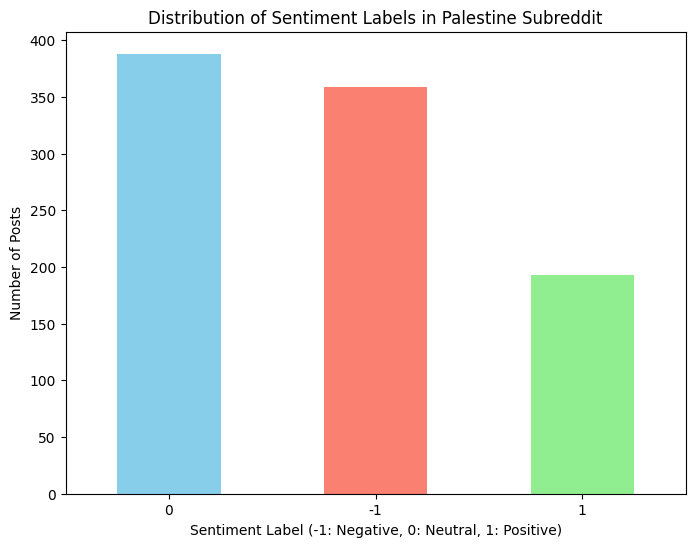

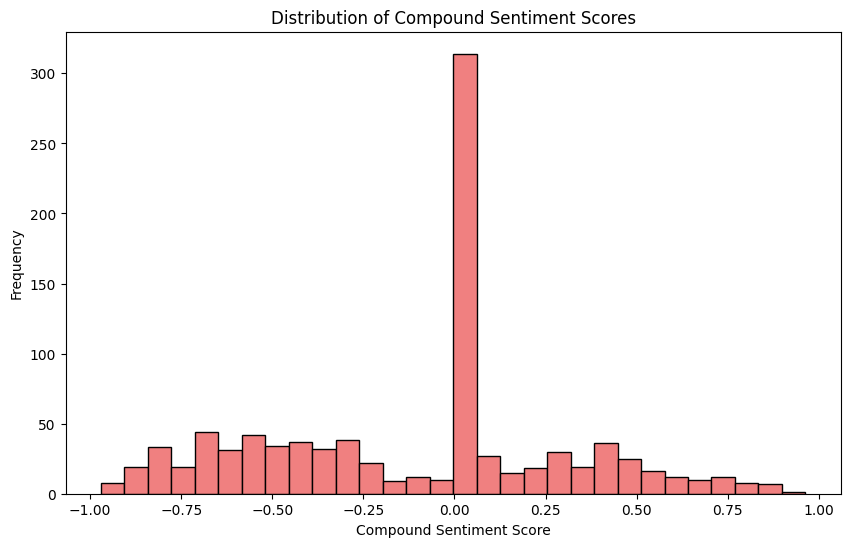

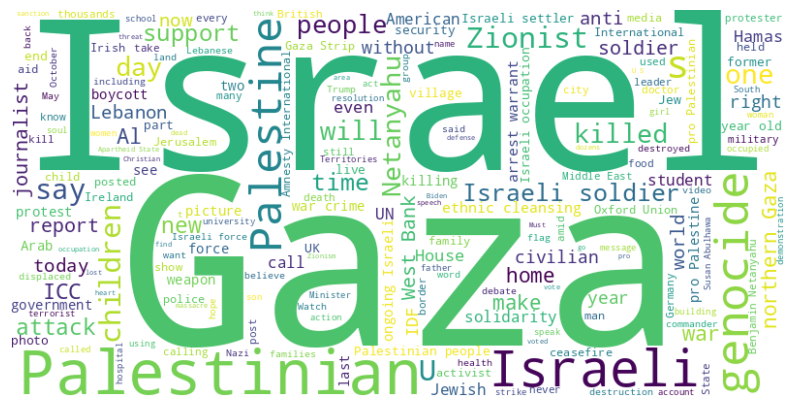

In [22]:
# prompt: Hello please suggest for me a plot

import matplotlib.pyplot as plt

# Assuming palestine_df is your DataFrame as shown in the code example
# ... (Your existing code to create palestine_df)

# 1. Sentiment Distribution Plot:
plt.figure(figsize=(8, 6))
palestine_df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Sentiment Labels in Palestine Subreddit')
plt.xlabel('Sentiment Label (-1: Negative, 0: Neutral, 1: Positive)')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

# 2. Compound Sentiment Score Histogram:
plt.figure(figsize=(10, 6))
plt.hist(palestine_df['compound'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# 3. Word Cloud (requires wordcloud library):
# !pip install wordcloud  # Install if not already installed
from wordcloud import WordCloud

text = " ".join(review for review in palestine_df.Titles)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 4.  Positive vs Negative Word Counts (requires more text preprocessing):

# 5. Time Series Analysis (if you have timestamps):
# If your data has timestamps, you can create a time series plot to show sentiment over time.
# Example:
# plt.plot(palestine_df['timestamp'], palestine_df['compound'])
# plt.xlabel("Time")
# plt.ylabel("Compound Sentiment")
# plt.title("Sentiment over Time")
# plt.show()



For fun, let's plot a bar chart:

<ipython-input-19-c71dc2684c06>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])


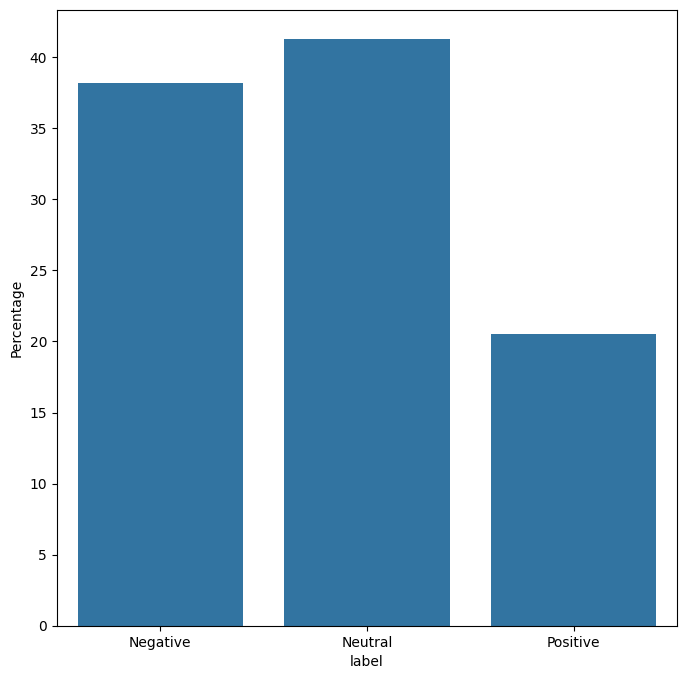

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 8))

counts = palestine_df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()


